In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.DataFrame.from_csv('/Users/kaitlin/ds/metis/metisgh/Puryear_Metis/Project3/noshowclean.csv', 
                      header=0, 
                      sep=',', 
                      index_col=0, 
                      parse_dates=True, 
                      encoding=None, 
                      tupleize_cols=None, 
                      infer_datetime_format=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [4]:
df = df.reset_index(drop=False)

In [5]:
y = df["Showed_up"]

In [6]:
X = df.drop(['Showed_up'], axis=1)

In [7]:
df.head()

,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text_Sent,Showed_up,woman,delta
0,False,False,False,False,False,False,False,False,False,False,...,62,False,True,False,False,False,False,True,True,0
1,False,False,False,False,False,False,False,False,False,False,...,56,False,False,False,False,False,False,True,False,0
2,False,False,False,False,False,False,False,False,False,False,...,62,False,False,False,False,False,False,True,True,0
3,False,False,False,False,False,False,False,False,False,False,...,8,False,False,False,False,False,False,True,True,0
4,False,False,False,False,False,False,False,False,False,False,...,56,False,True,True,False,False,False,True,True,0


In [34]:
# determining max depth
f1_df={}
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
for i in range(40):
    decisiontree = DecisionTreeClassifier(class_weight = 'balanced', max_depth=(i+30))
    decisiontree.fit(xtrain, ytrain)
    y_pred = decisiontree.predict(xtest)
    f1_df[i+30] = metrics.f1_score(y_pred, ytest)

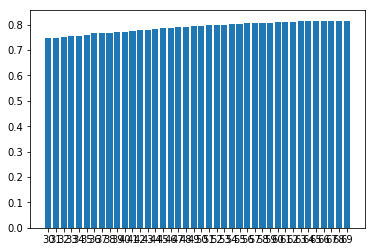

In [50]:
plt.bar(range(len(f1_df)), f1_df.values(), align="center")
plt.xticks(range(len(f1_df)), list(f1_df.keys()));

63 is the best depth with an f1 of 0.81

In [ ]:
for name, age in list.items():    # for name, age in list.items():  (for Python 3.x)
    if age == search_age:
        print name

In [17]:
print(metrics.f1_score(ytest, y_pred))

0.80991799926


In [8]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [10]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

decisiontree = DecisionTreeClassifier(class_weight = 'balanced', max_depth=6)
decisiontree.fit(X, y)
feat = df.columns[1:]
dot_data = StringIO()  
export_graphviz(decisiontree, out_file=dot_data,feature_names=feat,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

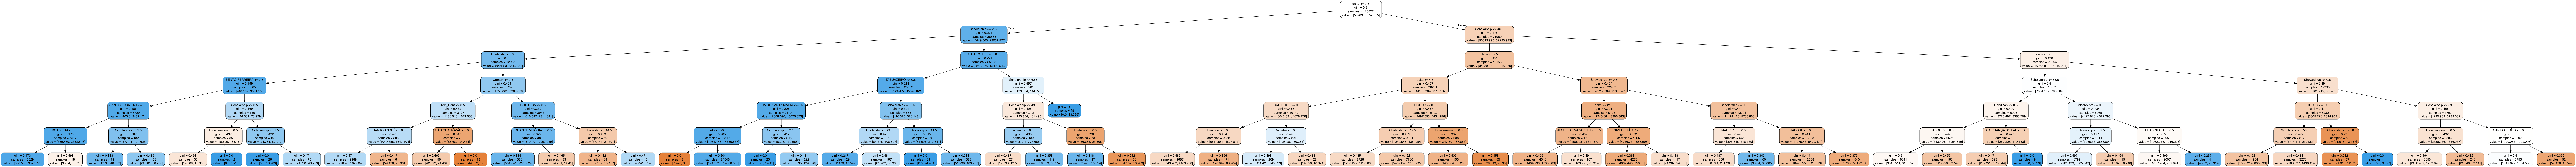

In [11]:
Image(graph[0].create_png())